In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ('user_id item_id rating timestamp').split()

In [3]:
# importing the data
df = pd.read_csv('u.data', sep='\t', names = column_names)

In [4]:
# check the data
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
# create a set with the movie titles
movie_titles = pd.read_csv('Movie_Id_Titles')

In [6]:
# merge the movie title into our data frame
df = pd.merge(df, movie_titles, on='item_id')

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [9]:
# check the most rated movies
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [10]:
# check the movies with more ratings
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
# create a data frame with the average rating by movie
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [12]:
# create a new column with the number of ratings by movie
ratings['num of ratings'] = df.groupby('title')['rating'].count()

In [13]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


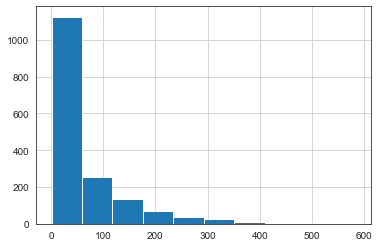

In [14]:
# visualize how the number of ratings is distributed
ratings['num of ratings'].hist()

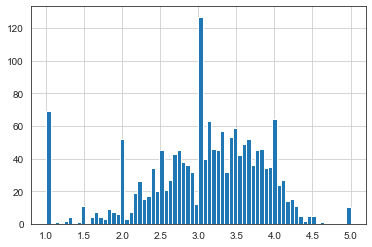

In [15]:
# visualize how ratings is distributed
ratings['rating'].hist(bins = 70)

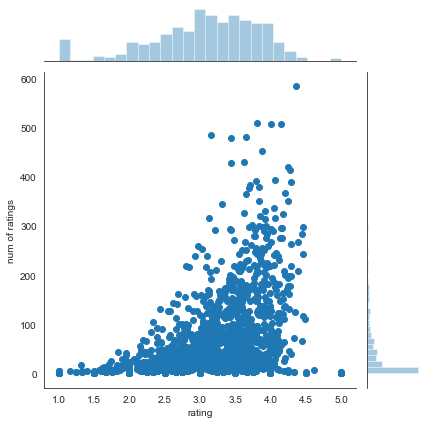

In [17]:
# visualize how the rating is correlated with the number of ratings
sns.jointplot(ratings['rating'], ratings['num of ratings'], data = ratings)

In [18]:
# checking out data set
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [19]:
# create a user by item matrix
moviemat = df.pivot_table(index='user_id', columns='title', values = 'rating')

In [22]:
ratings.sort_values('num of ratings', ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [25]:
# grab Star Wars ratings
start_wards_ratings = moviemat['Star Wars (1977)']

# grab Liar Liar ratings
liarliar_wards_ratings = moviemat['Liar Liar (1997)']

In [28]:
# compute the correlation between Star Wars and the other movies
similar_to_star_wars = moviemat.corrwith(start_wards_ratings)

In [30]:
# compute the correlation between Liar Liar and the other movies
similar_to_liarliar = moviemat.corrwith(liarliar_wards_ratings)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [32]:
# Save Star Wars correlation in a data frame
corr_start_wars = pd.DataFrame(similar_to_star_wars, columns=['Correlation'])
corr_start_wars.dropna(inplace=True)

In [38]:
# check the most similar movies
corr_start_wars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [39]:
# get the number of ratings
corr_start_wars = corr_start_wars.join(ratings['num of ratings'])

In [41]:
# get only movies with at least 100 ratings
corr_start_wars[corr_start_wars['num of ratings'] > 100].sort_values('Correlation', ascending=False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [42]:
# do the same for Liar Liar movie
corr_liar_liar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_liar_liar.dropna(inplace=True)

In [44]:
corr_liar_liar = corr_liar_liar.join(ratings['num of ratings'])

In [46]:
corr_liar_liar[corr_liar_liar['num of ratings']>= 100].sort_values('Correlation', ascending=False).head(15)

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
